In [1]:
pip install resampy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/DST'
print(os.listdir(data_path))

['test', 'val', 'train']


In [5]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

test
val
train


In [6]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [7]:
from pickle import dump
from pickle import load

In [8]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000134_5000.wav',
 'a_00000137_5000.wav',
 'a_00000122_0.wav',
 'a_00000130_0.wav',
 'a_00000134_0.wav',
 'a_00000127_0.wav',
 'a_00000136_0.wav',
 'a_00000126_0.wav',
 'a_00000136_5000.wav',
 'a_00000133_5000.wav',
 'a_00000123_0.wav',
 'a_00000128_0.wav',
 'a_00000128_5000.wav',
 'a_00000135_0.wav',
 'a_00000132_5000.wav',
 'a_00000127_5000.wav',
 'a_00000131_5000.wav',
 'a_00000131_0.wav',
 'a_00000132_0.wav',
 'a_00000107_5000.wav',
 'a_00000095_5000.wav',
 'a_00000097_5000.wav',
 'a_00000114_5000.wav',
 'a_00000091_5000.wav',
 'a_00000129_0.wav',
 'a_00000092_5000.wav',
 'a_00000119_0.wav',
 'a_00000098_5000.wav',
 'a_00000108_0.wav',
 'a_00000095_0.wav',
 'a_00000103_0.wav',
 'a_00000089_0.wav',
 'a_00000103_5000.wav',
 'a_00000115_0.wav',
 'a_00000086_5000.wav',
 'a_00000104_0.wav',
 'a_00000121_5000.wav',
 'a_00000116_5000.wav',
 'a_00000121_0.wav',
 'a_00000108_5000.wav',
 'a_00000110_0.wav',
 'a_00000093_0.wav',
 'a_00000118_0.wav',
 'a_00000109_0.wav',
 'a_00000111_0.w

In [9]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000032_5000.wav',
 'a_00000102_5000.wav',
 'n_00000366_5000.wav',
 'a_00000096_5000.wav',
 'a_00000022_0.wav',
 'a_00000100_5000.wav',
 'a_00000008_5000.wav',
 'a_00000063_0.wav',
 'a_00000035_5000.wav',
 'a_00000045_0.wav',
 'a_00000125_0.wav',
 'a_00000062_0.wav',
 'a_00000016_0.wav',
 'a_00000123_5000.wav',
 'n_00000324_5000.wav',
 'a_00000047_5000.wav',
 'a_00000058_0.wav',
 'a_00000115_5000.wav',
 'n_00000335_0.wav',
 'n_00000372_5000.wav',
 'a_00000010_0.wav',
 'a_00000036_0.wav',
 'a_00000104_5000.wav',
 'n_00000376_0.wav',
 'a_00000007_0.wav',
 'a_00000013_5000.wav',
 'a_00000130_5000.wav',
 'a_00000018_5000.wav',
 'a_00000053_0.wav',
 'a_00000012_0.wav',
 'n_00000370_0.wav',
 'n_00000368_5000.wav',
 'n_00000341_0.wav',
 'n_00000340_0.wav',
 'a_00000001_0.wav',
 'a_00000093_5000.wav',
 'a_00000031_5000.wav',
 'a_00000072_0.wav',
 'a_00000129_5000.wav',
 'a_00000074_5000.wav',
 'a_00000116_0.wav',
 'a_00000079_0.wav',
 'a_00000064_5000.wav',
 'n_00000346_0.wav',
 'a_000001

In [10]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000085_5000.wav',
 'a_00000125_5000.wav',
 'a_00000105_0.wav',
 'a_00000074_0.wav',
 'a_00000137_0.wav',
 'a_00000068_0.wav',
 'a_00000073_0.wav',
 'a_00000011_0.wav',
 'n_00000371_0.wav',
 'a_00000133_0.wav',
 'a_00000075_0.wav',
 'n_00000345_5000.wav',
 'a_00000091_0.wav',
 'n_00000353_0.wav',
 'a_00000005_0.wav',
 'a_00000020_0.wav',
 'n_00000380_0.wav',
 'a_00000099_0.wav',
 'a_00000019_0.wav',
 'n_00000365_0.wav',
 'a_00000087_0.wav',
 'a_00000033_0.wav',
 'n_00000377_0.wav',
 'a_00000057_5000.wav',
 'a_00000027_5000.wav',
 'a_00000001_5000.wav',
 'a_00000028_0.wav',
 'n_00000365_5000.wav',
 'a_00000055_5000.wav',
 'a_00000126_5000.wav',
 'a_00000066_0.wav',
 'n_00000369_0.wav',
 'a_00000030_5000.wav',
 'a_00000053_5000.wav',
 'a_00000124_5000.wav',
 'a_00000011_5000.wav',
 'a_00000052_0.wav',
 'n_00000334_5000.wav',
 'a_00000083_0.wav',
 'a_00000098_0.wav',
 'a_00000088_5000.wav',
 'n_00000360_0.wav',
 'a_00000124_0.wav',
 'a_00000100_0.wav',
 'a_00000080_0.wav',
 'a_000000

In [11]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [12]:
normal_train

'/content/drive/MyDrive/DST/train/n_*.wav'

In [13]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [14]:
import librosa
import librosa.display

In [15]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [16]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [17]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [18]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [19]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [20]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [21]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [22]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [23]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

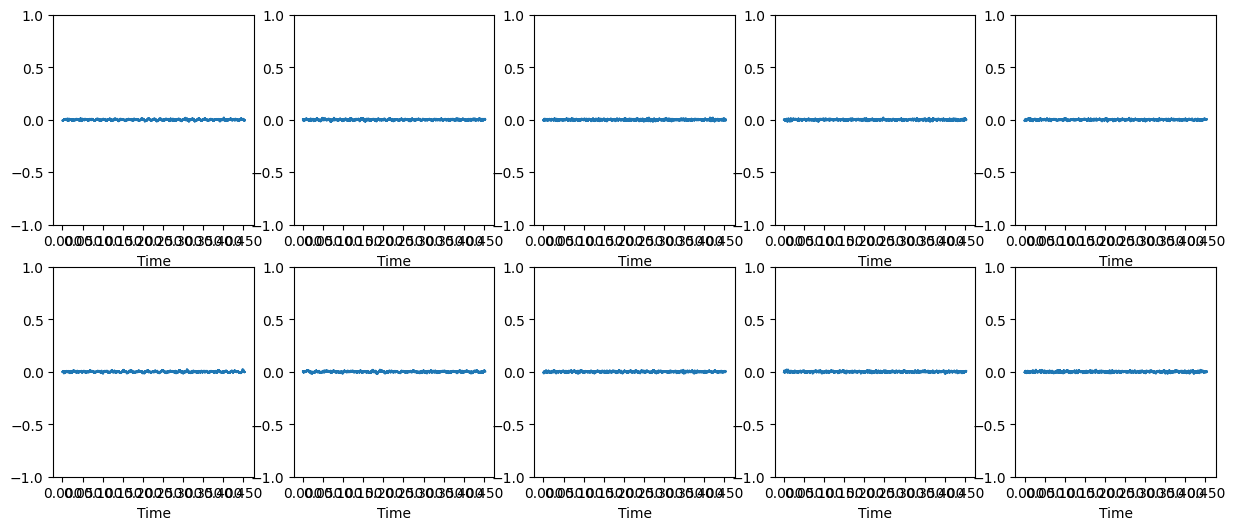

In [24]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

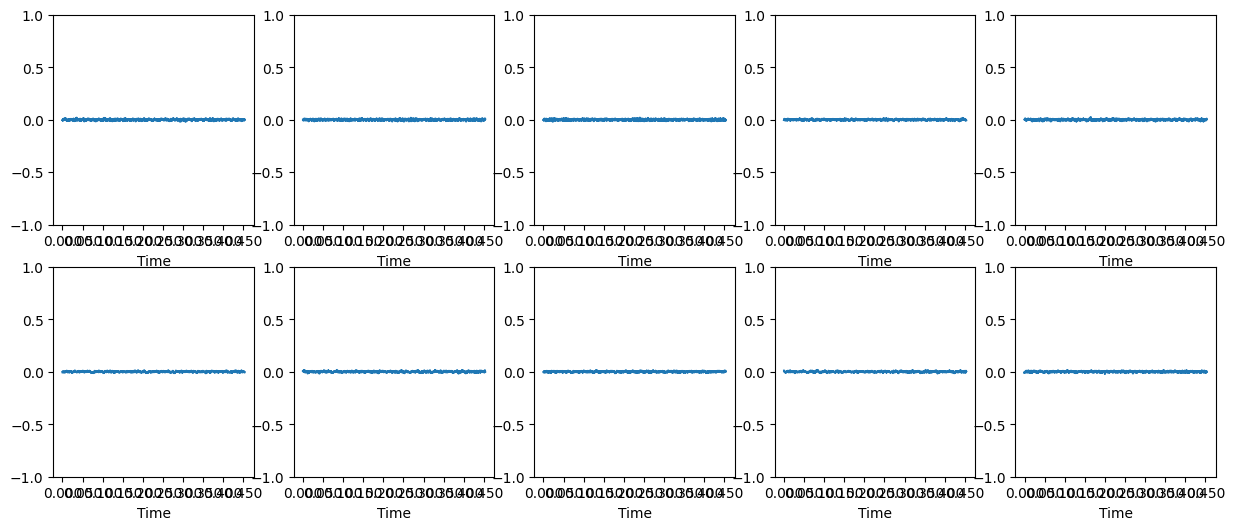

In [25]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [26]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [27]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [28]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [29]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [30]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[2.63671875e-02 1.37221592e+03]
[2.78320312e-02 1.45696951e+03]
[6.39648438e-02 1.94236052e+03]
[5.71289062e-02 2.03609225e+03]


Text(0, 0.5, 'Count')

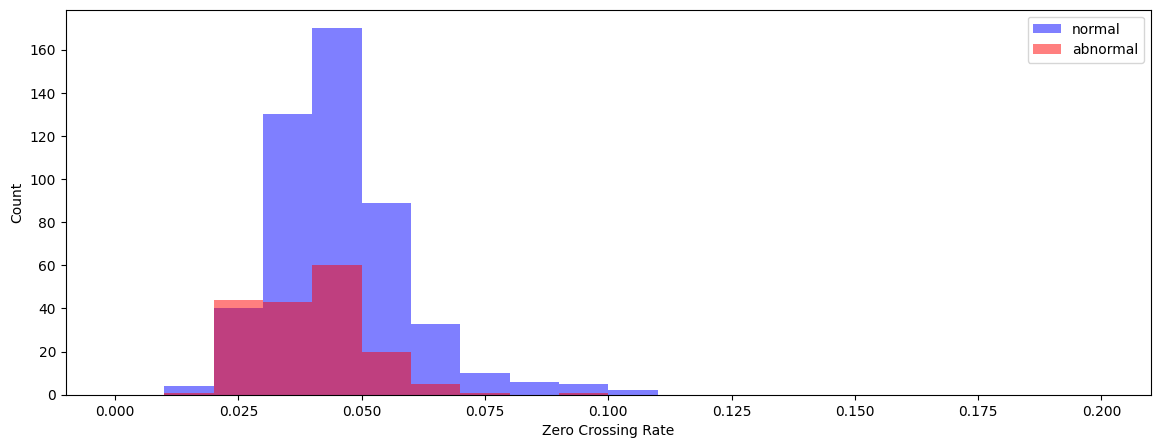

In [31]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

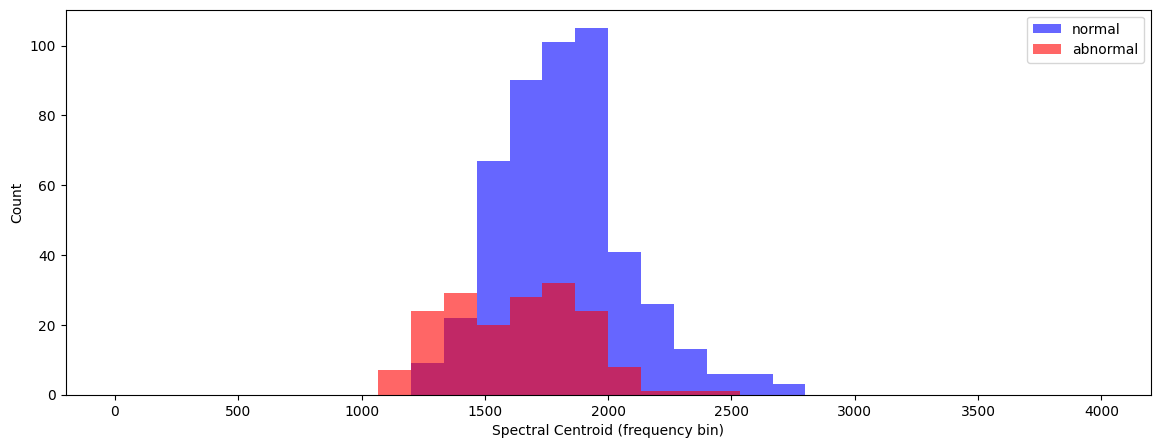

In [32]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [33]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [34]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [35]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [36]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

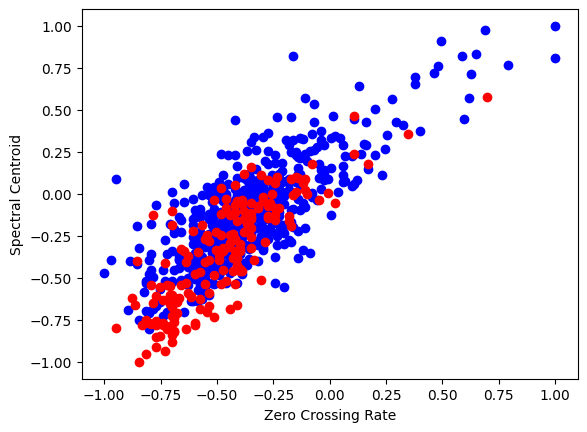

In [37]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [38]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [39]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [40]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [42]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [43]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [45]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [46]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7363 - loss: 0.6556 - val_accuracy: 0.7169 - val_loss: 0.6433
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7622 - loss: 0.6296 - val_accuracy: 0.7169 - val_loss: 0.6322
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7505 - loss: 0.6184 - val_accuracy: 0.7169 - val_loss: 0.6232
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7349 - loss: 0.6123 - val_accuracy: 0.7169 - val_loss: 0.6159
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.6106 - val_accuracy: 0.7169 - val_loss: 0.6096
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7251 - loss: 0.6045 - val_accuracy: 0.7169 - val_loss: 0.6046
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7455 - loss: 0.5785 - val_accuracy: 0.7169 - val_loss: 0.6001
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7457 - loss: 0.5689 - val_accu

In [48]:
import plotly
import plotly.graph_objs as go

In [49]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [50]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [52]:
file_name = '/content/drive/MyDrive/DST/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


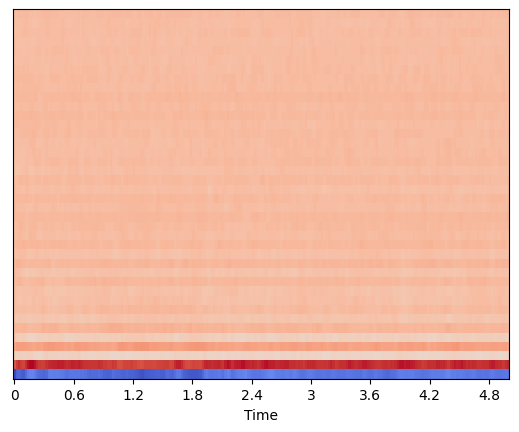

In [53]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [54]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [55]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [56]:
normal_train_features[0].shape

(40, 216)

In [57]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [58]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [59]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [60]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [61]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [62]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [63]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [64]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [65]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [66]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [68]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.5714 - loss: 5.2131
Epoch 1: val_loss improved from inf to 0.63157, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 701ms/step - accuracy: 0.5721 - loss: 5.1358 - val_accuracy: 0.6988 - val_loss: 0.6316
Epoch 2/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7231 - loss: 1.3287 
Epoch 2: val_loss did not improve from 0.63157
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7243 - loss: 1.3058 - val_accuracy: 0.2952 - val_loss: 0.8286
Epoch 3/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6126 - loss: 0.7716 
Epoch 3: val_loss improved from 0.63157 to 0.53590, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6523 - loss: 0.7214 - val_accuracy: 0.8614 - val_loss: 0.5359
Epoch 4/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7867 - loss: 0.5035 
Epoch 4: val_loss improved from 0.53590 to 0.45871, saving model to best_model.keras
11/11 ━━━━━

In [69]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [70]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [71]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [72]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.2056, acc: 0.9232
Validation- loss: 0.2200, acc: 0.9277


In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [74]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [ 11  36]]


In [75]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9147    0.9916    0.9516       119
    abnormal     0.9730    0.7660    0.8571        47

    accuracy                         0.9277       166
   macro avg     0.9439    0.8788    0.9044       166
weighted avg     0.9312    0.9277    0.9249       166



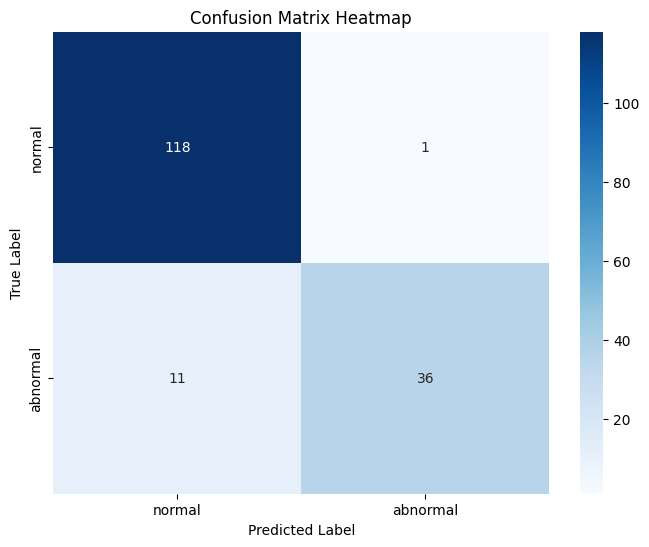

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

#การบ้าน ให้ทำการ พรีดิก โฟลเดอร์ test เพิ่ม

In [77]:
file_name = '/content/drive/MyDrive/DST/test/a_00000001_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


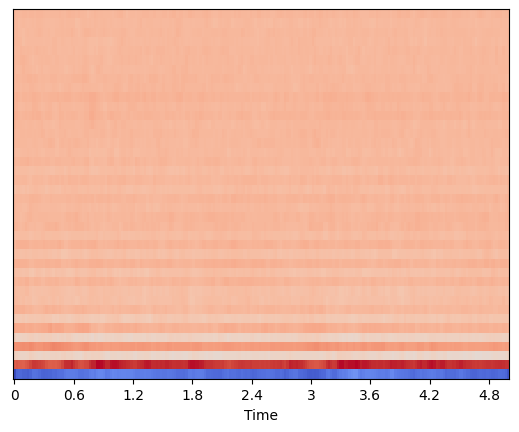

In [78]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [79]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [80]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [81]:
normal_train_features[0].shape

(40, 216)

In [82]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [83]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [84]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [85]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [86]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [87]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [88]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [89]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [90]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [91]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [93]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.6067 - loss: 4.9856
Epoch 1: val_loss improved from inf to 2.08220, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 569ms/step - accuracy: 0.6083 - loss: 4.9460 - val_accuracy: 0.7169 - val_loss: 2.0822
Epoch 2/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6830 - loss: 3.0203
Epoch 2: val_loss improved from 2.08220 to 0.69312, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6647 - loss: 2.7986 - val_accuracy: 0.7169 - val_loss: 0.6931
Epoch 3/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7497 - loss: 1.1784
Epoch 3: val_loss improved from 0.69312 to 0.54677, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7403 - loss: 1.1133 - val_accuracy: 0.8373 - val_loss: 0.5468
Epoch 4/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7515 - loss: 0.5194
Epoch 4: val_loss did not improve from 0.54677
11/11 ━━━━━

In [94]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [95]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [96]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [97]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")

Training  - loss: 0.2158, acc: 0.9232
Validation- loss: 0.2231, acc: 0.9217


In [98]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [99]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [ 12  35]]


In [100]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9077    0.9916    0.9478       119
    abnormal     0.9722    0.7447    0.8434        47

    accuracy                         0.9217       166
   macro avg     0.9400    0.8681    0.8956       166
weighted avg     0.9260    0.9217    0.9182       166



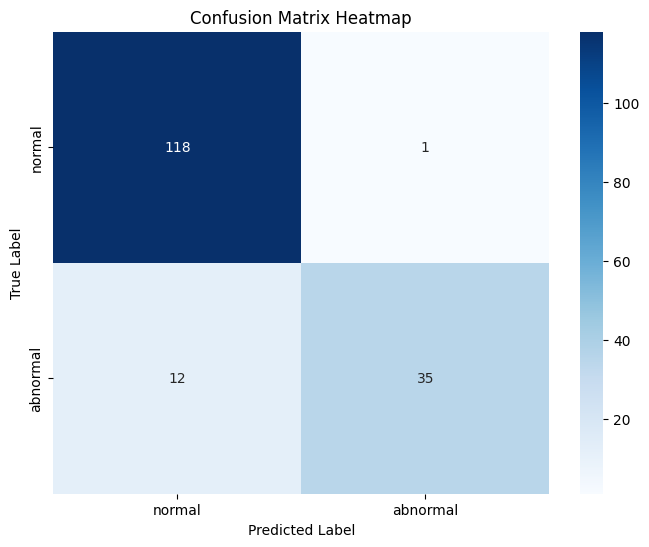

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()